8
Counter({6: 233241, 1: 233241, 5: 177124, 7: 137081, 4: 48167, 8: 35914, 3: 9937, 2: 2830, 9: 2670, 0: 2562})


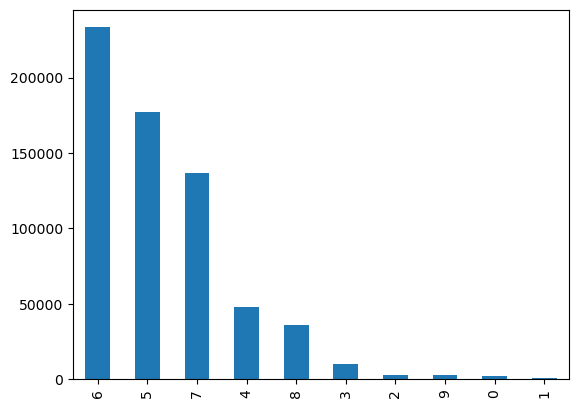

In [20]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error



df = pd.read_csv('pred_course.csv')
print(len(df.columns))

#print(df.Ref)
X=df[['progcode','c_num','WPA1','c_num']]
#print(X)
#df.head(10)
Y=df["WPA2"]
XX=X.values
YY=Y.values
df["WPA2"].value_counts().plot(kind='bar')
regressor=DecisionTreeRegressor(random_state=0)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(XX,YY,test_size=0.1,random_state=0)
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, Y_over = oversample.fit_resample(XX, YY)
print(Counter(Y_over))


In [21]:
regressor.fit(X_train,Y_train)
pred=regressor.predict(X_test)
precision = precision_score(Y_test,pred.round(),average='micro')
recall = recall_score(Y_test,pred.round(),average='micro')
accuracy=accuracy_score(Y_test,pred.round())
f1=f1_score(Y_test,pred.round(),average='micro')
#y_pred_proba = regressor.predict_proba(X_test)[::,1]
#auc=metrics.roc_auc_score(Y_test,y_pred_proba)
mse = mean_squared_error(Y_test, pred)

print('Precision: ',precision)
print('Recall:',recall)
print('Accuracy:',accuracy)
print('F1 score:',f1)
print("Mean Squared Error:", mse)
#print('AUC',auc)
#print(classification_report(pred,Y_test))

Precision:  0.4121037021100029
Recall: 0.4121037021100029
Accuracy: 0.4121037021100029
F1 score: 0.4121037021100029
Mean Squared Error: 1.053207193495935


In [ ]:
y_pred = regressor.predict([[1,1328,7,1338]])
print(y_pred.round())

In [37]:
dtree=DecisionTreeClassifier()
dtree=dtree.fit(X,Y)
data=tree.export_graphviz(dtree,out_file=None,feature_names=X.columns.values)
graph=pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
plt.figure(figsize=(10,15))
img=plt.imread('mydecisiontree.png')
plt.imshow(img)

KeyboardInterrupt: 

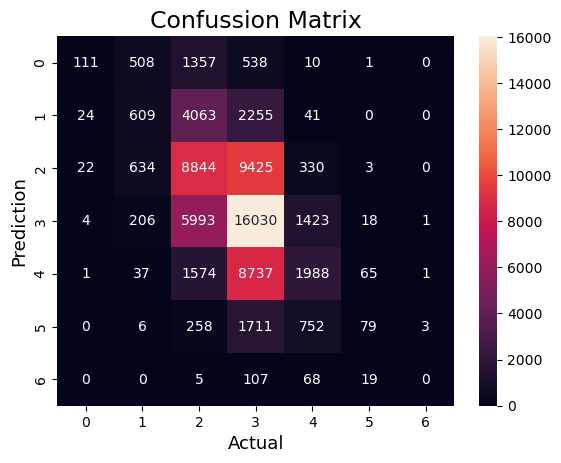

In [7]:
cm= confusion_matrix(Y_test,pred.round())
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confussion Matrix', fontsize=17)
plt.show()